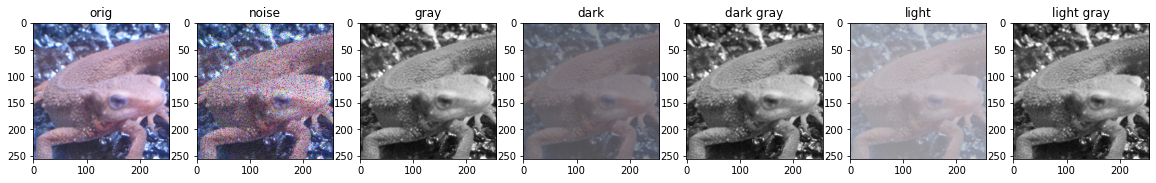

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_light.png')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray'); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray'); plt.title('light gray')
plt.show()

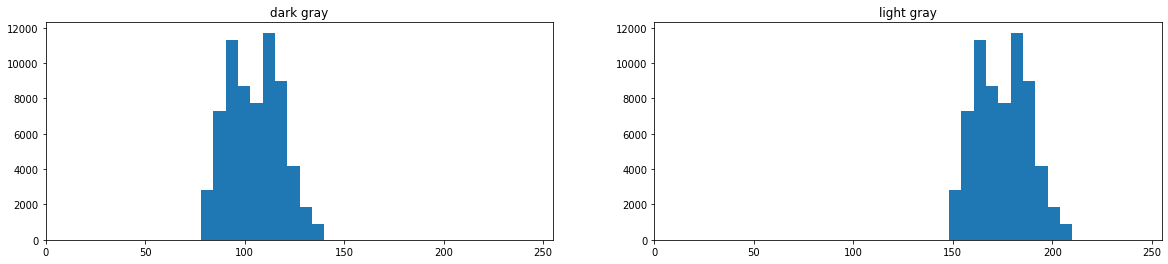

In [2]:
# Q.21 ヒストグラム正規化, Histogram normalization
# ヒストグラム正規化は濃度階調変換(gray-scale transformation) とも呼ばれる
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.hist(img_dark_gray.ravel())
plt.xlim(0, 255)
plt.title('dark gray')
plt.subplot(1, 2, 2)
plt.hist(img_light_gray.ravel())
plt.xlim(0, 255)
plt.title('light gray')
plt.show();

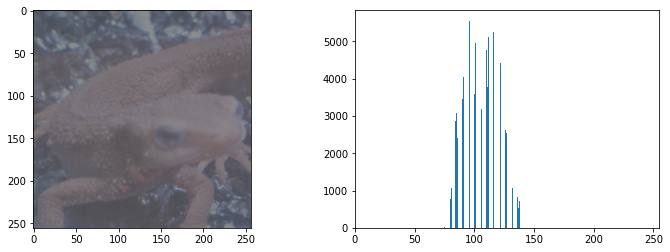

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(img_dark)
plt.subplot(1, 2, 2)
plt.hist(img_dark.ravel(), bins=255)
plt.xlim([0, 255])
plt.show();

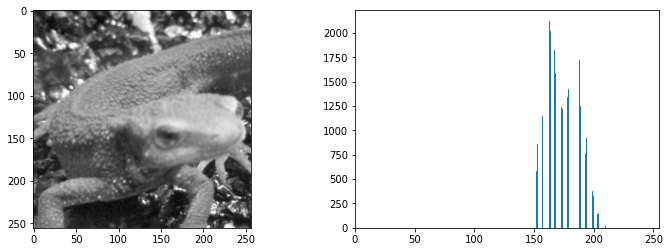

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(img_light_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.hist(img_light_gray.ravel(), bins=255)
plt.xlim([0, 255])
plt.show();

In [6]:
# 画素の差
print(img_dark.min(), img_dark.max())

71 140


In [7]:
def hist_normalize(img, a, b):
    c, d = img.min(), img.max()
    out = (b-a)/(d-c) * (img - c) + a
    out[img < c] = a
    out[img > d] = b
    return np.clip(out, 0, 255).astype(np.uint8)

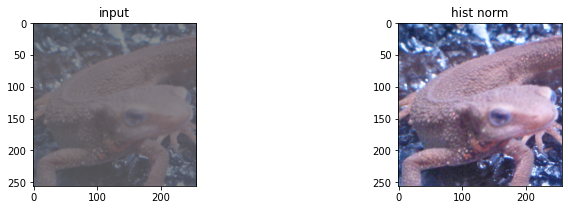

In [8]:
# 平滑化
img_dark_hist_norm = hist_normalize(img_dark, a = 0, b = 255)

plt.figure(figsize=(12, 3))
plt.subplot(1,2 ,1)
plt.title('input')
plt.imshow(img_dark)
plt.subplot(1, 2, 2)
plt.title('hist norm')
plt.imshow(img_dark_hist_norm)
plt.show();

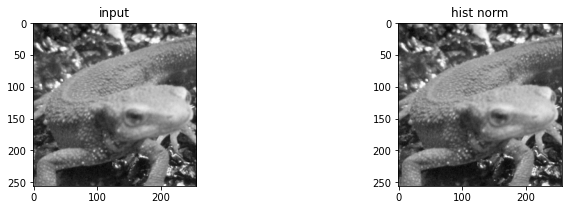

In [10]:
img_light_gray_hist_norm = hist_normalize(img_light_gray, a = 0, b = 255)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_light_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('hist norm')
plt.imshow(img_light_gray_hist_norm, cmap='gray')
plt.show();

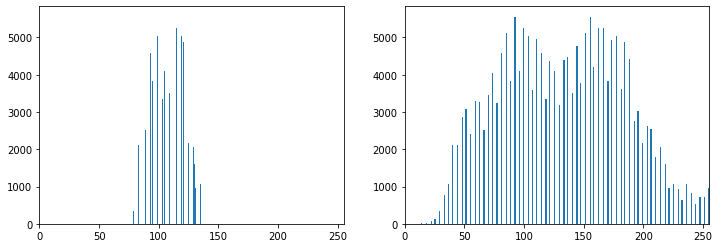

In [13]:
# ヒストグラムを見てみる
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img_dark.ravel(), bins=255)
plt.xlim([0, 255])
plt.subplot(1, 2, 2)
plt.hist(img_dark_hist_norm.ravel(), bins=255)
plt.xlim([0, 255])
plt.show();

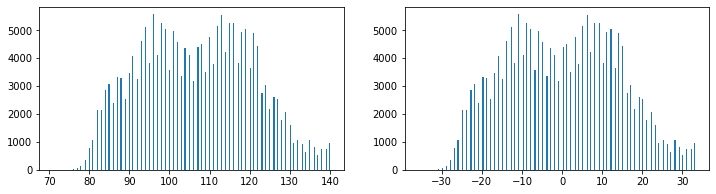

In [15]:
# Q.22 ヒストグラムのスケーリングとシフト, Histogram scaling and shift
# ヒストグラムの平均値をm0=128、標準偏差をs0=50になるように操作する
# ヒストグラムのダイナミックレンジを変更するのではなく、ヒストグラムを平坦に変更する操作

# 原理1: x - 平均 の操作により、操作後の平均を0にする
plt.figure(figsize=(12, 3))
plt.subplot(1,2, 1)
plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1,2, 2)
plt.hist((img_dark - img_dark.mean()).ravel(), bins=255)
plt.show();

In [17]:
# 標準偏差や分散は変わらない
print(img_dark.std(), (img_dark - img_dark.mean()).std())

14.010876302431814 14.010876302431814


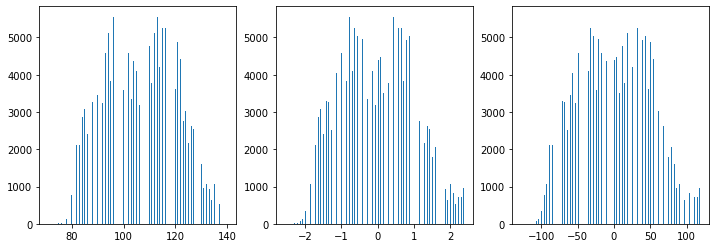

In [21]:
# 原理2: s / s0 は画素のstdを1にした後、希望の値にスケーリングする操作
plt.figure(figsize=(12, 4))
plt.subplot(1,3 ,1)
plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 3, 2)
# この状態が平均0, 標準偏差50の状態
plt.hist(1 / img_dark.std() * (img_dark - img_dark.mean()).ravel(), bins=255)
# この状態が平均0, 標準偏差50の状態
plt.subplot(1, 3, 3)
plt.hist(50/img_dark.std() * (img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()

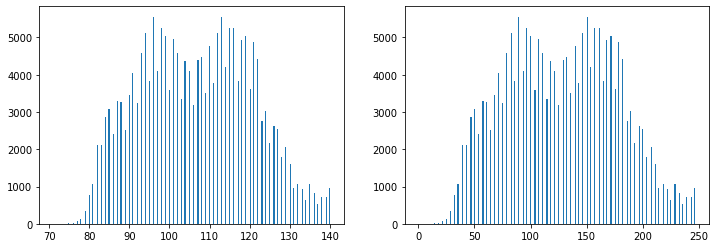

In [23]:
# 原理3: +m　をすることは、欲しい平均にシフトさせる操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2)
# 平均128, 標準偏差50のhist
plt.hist(50 / img_dark.std() * (img_dark -  img_dark.mean()).ravel() + 128, bins=255)
plt.show();

In [26]:
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = s / s0 * (img - m0) + m
    return np.clip(out, 0, 255).astype(np.uint8)

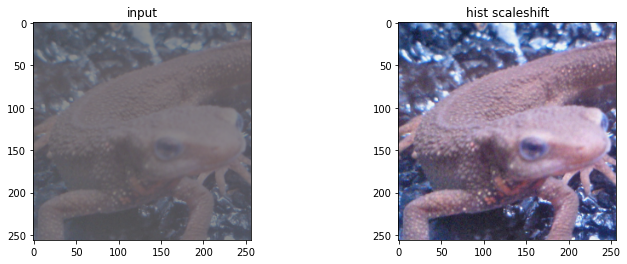

In [27]:
img_dark_hist_scaleshift = hist_scaleshift(img_dark, m = 128, s=50)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_dark)
plt.subplot(1, 2, 2)
plt.title('hist scaleshift')
plt.imshow(img_dark_hist_scaleshift)
plt.show()

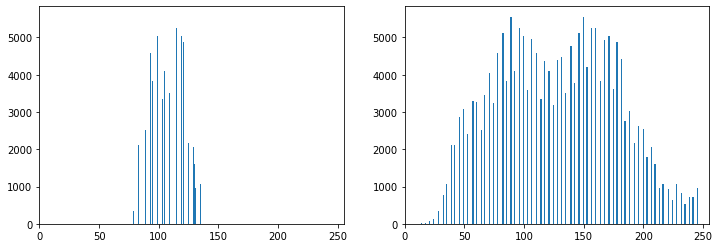

In [29]:
# ヒストグラムを表示(画素が分散している)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(img_dark.ravel(), bins=255)
plt.xlim([0, 255])
plt.subplot(1, 2, 2)
plt.hist(img_dark_hist_scaleshift.ravel(), bins=255)
plt.xlim([0, 255])
plt.show();

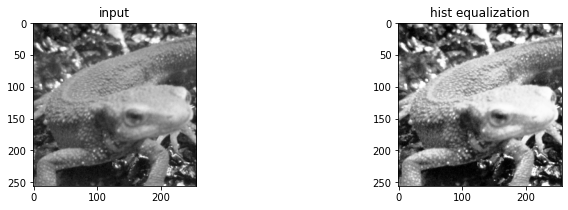

In [30]:
# Q.23. ヒストグラム平坦化, Histogram equalization
# ヒストグラム平坦化とはヒストグラムを平坦に変更する操作であり、
# 上記の平均値や標準偏差などを必要とせず、ヒストグラム値を均衡にする操作

# opencv(グレースケールのみしか対応していない？)
img_dark_hist_equ = cv2.equalizeHist(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_dark_gray,  cmap='gray')
plt.subplot(1, 2, 2)
plt.title('hist equalization')
plt.imshow(img_dark_hist_equ,  cmap='gray')
plt.show();

In [41]:
def hist_equ(img):
    out = np.zeros_like(img, dtype=np.float32)
    
    s = img.size
    x_max = 255
    h = 0
    
    for i in range(256):
        # 画素がiのものの数を合計している
        h += (img == i).sum()
        out[img == i] = x_max / s * h
        
    return np.clip(out, 0, 255).astype(np.uint8)

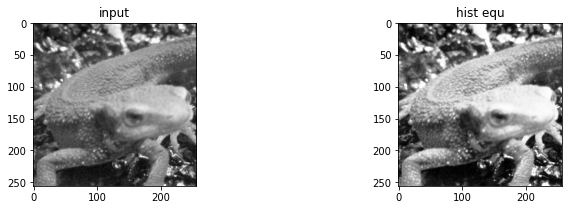

In [43]:
img_dark_gray_hist_equ = hist_equ(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('hist equ')
plt.imshow(img_dark_gray_hist_equ, cmap='gray')
plt.show();

In [47]:
def hist_equ_rgb(img):
    out = np.zeros_like(img, dtype=np.float32)
    
    s = img.shape[0] * img.shape[1]
    x_max = 255
    
    for c in range(3):
        h = 0
        for i in range(256):
            h += (img[:, :, c]== i).sum()
            out[:, :, c][img[:, :, c] == i] = x_max/s * h
            
    return np.clip(out, 0, 255).astype(np.uint8)

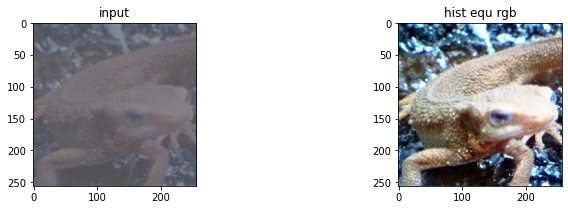

In [48]:
img_dark_hist_equ = hist_equ_rgb(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_dark)
plt.subplot(1, 2, 2)
plt.title('hist equ rgb')
plt.imshow(img_dark_hist_equ)
plt.show();

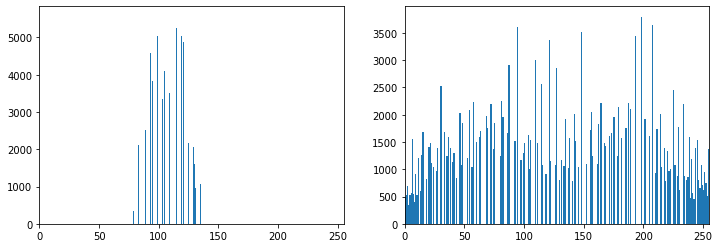

In [49]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

In [50]:
# RGB でやるなら、 RGBを一括でやるべきか？
def hist_equ_rgb_2(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255

    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

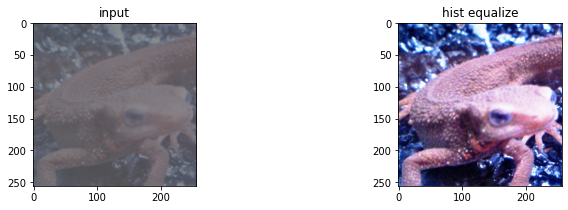

In [51]:
# RGBだと画像がめっちゃきれいになる
img_dark_hist_equ_2 = hist_equ_rgb_2(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ_2)
plt.show()

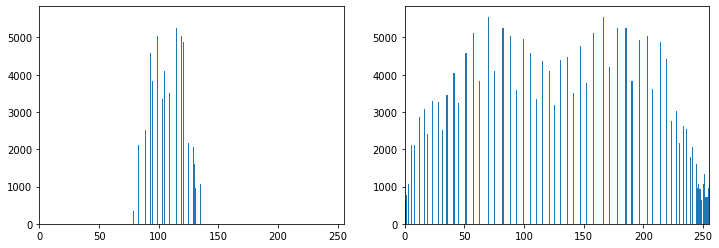

In [52]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ_2.ravel(), bins=255); plt.xlim([0, 255])
plt.show()


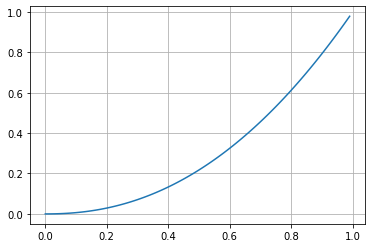

In [54]:
# Q.24. ガンマ補正, Gamma correction
# ガンマ補正とは、カメラなどの媒体の経由によって画素値が非線形的に変換された場合の補正
# ディスプレイなどで画像をそのまま表示すると画面が暗くなってしまうため、
# RGBの値を予め大きくすることで、ディスプレイの特性を排除した画像表示を行うことがガンマ補正の目的

x = np.arange(0, 1, 0.01)
plt.plot(x, x ** 2.2)
plt.grid()
plt.show();

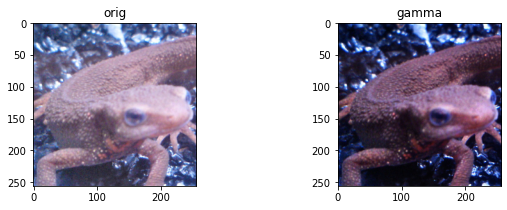

In [55]:
# 上記のプロットを線形に直すことが目的
# このくらいガンマによって画像が変わる(らしい)
img_gamma = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_gamma.png')
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_gamma); plt.title('gamma')
plt.show()

In [58]:
def gamma_corr(img, c, g):
    # 正規化をするように[0, 1]
    out = (1/c * (img / 255)) ** (1/ g)
    # 255をoutにかけることで元のサイズに戻す必要がある！忘れてしまうと真っ黒になるよ
    return np.clip(out * 255, 0, 255).astype(np.uint8)

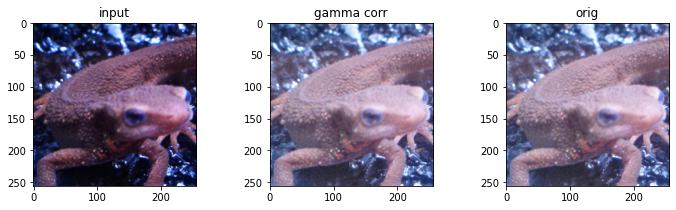

In [60]:
img_gamma_corr = gamma_corr(img_gamma, c=1, g=2.2)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_gamma)
plt.subplot(1, 3, 2)
plt.title('gamma corr')
plt.imshow(img_gamma_corr)
plt.subplot(1, 3, 3)
plt.title('orig')
plt.imshow(img_orig)
plt.show();

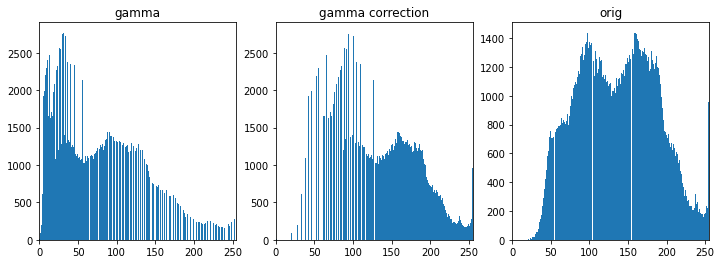

In [61]:
# ヒストグラム
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_gamma.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma')
plt.subplot(1, 3, 2); plt.hist(img_gamma_corr.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma correction')
plt.subplot(1, 3, 3); plt.hist(img_orig.ravel(), bins=255); plt.xlim([0, 255]); plt.title('orig')
plt.show()

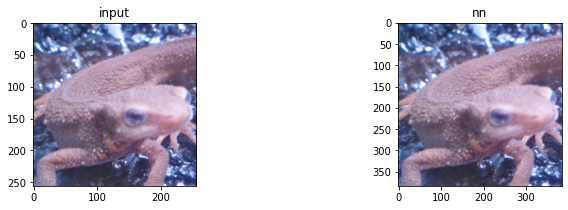

In [63]:
# Q.25. 最近傍補間, Nearest nighbor interpolation (NN法)
# 最近傍補間により画像を1.5倍に拡大させる

# 最近傍補間(Nearest Neighbor)は画像の拡大時に最近傍にある画素をそのまま使う手法。
# シンプルで処理速度が速いが、画質の劣化は著しい(よくない)

# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)), 
                   interpolation = cv2.INTER_NEAREST)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('nn')
plt.imshow(img_nn)
plt.show();


In [103]:
def nn_inter(img, a, b):
    out_h = int(img.shape[0] * a)
    out_w = int(img.shape[1] *b)
    out = np.zeros([out_h, out_w, img.shape[2]], dtype=np.uint8)
    
    # https://deepage.net/features/numpy-meshgrid.html
    # デフォルトはx, yをそれぞれ見ていく
    xs, ys = np.meshgrid(range(out_h), range(out_w))
    out[xs, ys] = img[np.round(xs/a).astype(int), np.round(ys/b).astype(int)]
    return out

In [104]:
# a = np.array([
#     [[1], [5]],
#     [[9], [14]]
# ])
# print(a[1, 1])
# x = np.array([[0, 1], [1, 0]])
# y = np.array([[1, 0], [0, 1]])
# print(a[x, y])
# a.shape

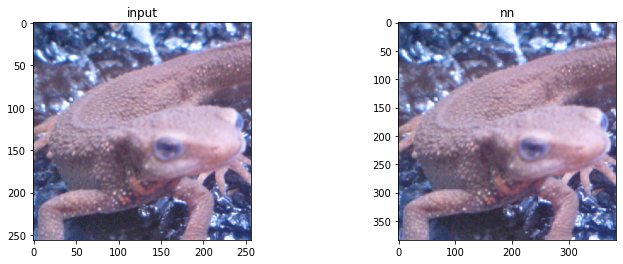

In [105]:
img_nn = nn_inter(img_orig, a = 1.5, b=1.5)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_orig)
plt.title('input')
plt.subplot(1, 2, 2)
plt.imshow(img_nn)
plt.title('nn')
plt.show()